# Model 3: Predicting Student Enrollment

## Dataset Background

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("datasets/college-enrollment.csv")

## Part 1: Exploratory Data Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [20]:
# check for any missing values
df.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

The dataset used is pretty clean and doesn't have any null values that need to be filled in.

In [22]:
# value counts for each column

for row in df:
  print(f"{df[row].value_counts()}")
  print("===============================================\n")

Academic      609
Vocational    391
Name: type_school, dtype: int64

B    519
A    481
Name: school_accreditation, dtype: int64

Male      515
Female    485
Name: gender, dtype: int64

Very Interested    324
Uncertain          261
Less Interested    229
Interested         100
Not Interested      86
Name: interest, dtype: int64

Urban    539
Rural    461
Name: residence, dtype: int64

52    144
53    126
54    110
51     94
50     93
55     82
49     69
56     53
48     42
47     34
57     32
58     26
46     22
59     17
60     15
45     13
44      8
43      6
61      4
41      2
42      2
40      2
62      2
64      1
65      1
Name: parent_age, dtype: int64

5920000    7
4740000    7
5840000    6
3540000    6
5720000    6
          ..
6030000    1
4000000    1
3750000    1
2960000    1
3270000    1
Name: parent_salary, Length: 461, dtype: int64

67.0     9
76.0     8
79.7     7
75.9     7
86.3     7
        ..
58.5     1
44.7     1
67.6     1
84.4     1
105.8    1
Name: house_area, L

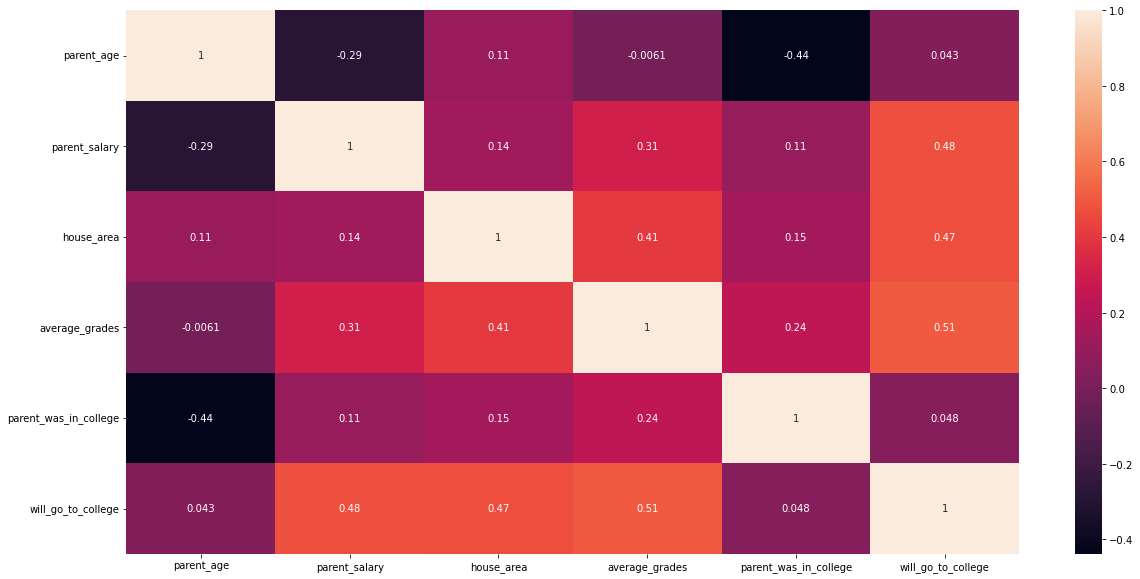

In [25]:
# Correlation Matrix 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Plotting a correlation showed us that the highest in negative correlation with **will_go_to_college** was **parent_was_in_college** and **parent_age**.

The highest positive correlation with **will_go_to_college** is **parent_salary**, **house_area**, and **average_grades**.

We selected our final features based on (1) the feature is information that the students will be able to provide and (2) the feature has an absolute correlation of 0.01 or higher with **will_go_to_college**.

## Part 2: Dataset Preparation

In [26]:
# drop features we are not asking about in questionnaire
del df['interest']
del df['school_accreditation']

In [27]:
# encode categorical column to numeric ones

df['type_school']=df['type_school'].map({'Academic': 0,'Vocational': 1})
df['gender']=df['gender'].map({'Male': 0,'Female': 1})
df['residence']=df['residence'].map({'Urban':0,'Rural': 1})
df["parent_was_in_college"] = df["parent_was_in_college"].astype(int)
df["will_go_to_college"] = df["will_go_to_college"].astype(int)
df

,type_school,gender,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,0,56,6950000,83.0,84.09,0,1
1,0,0,0,57,4410000,76.8,86.91,0,1
2,0,1,0,50,6500000,80.6,87.43,0,1
3,1,0,1,49,6600000,78.2,82.12,1,1
4,0,1,0,57,5250000,75.1,86.79,0,0
...,...,...,...,...,...,...,...,...,...
995,1,1,1,49,7420000,63.6,85.99,1,1
996,0,1,1,51,7480000,84.3,89.72,1,1
997,1,0,0,49,5550000,75.2,79.56,0,1
998,0,0,1,53,5840000,105.8,87.18,1,1


In [28]:
# check for null values

df.isna().sum()

type_school              0
gender                   0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [29]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluation Mertics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
# Other Libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

### Data Cleaning and Scaling

In [30]:
X = df.drop(['will_go_to_college'], axis=1)
y = df['will_go_to_college']

In [31]:
# Scaling the data 
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

## Part 3: Model Training & Evaluation

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# helper method to print basic model metrics
def metrics(y_true, y_pred, accuracy_score):
    print('\nThe accuracy score is {:03.2f}\n'.format(accuracy_score))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("The Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_true, y_pred, labels=log.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
    disp.plot()
    plt.show()

def avg_score_uncertainty(scores):
  print(scores)
  avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
  print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 8), (800,), (200, 8), (200,))

#### Logistic Regression

In [44]:
# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [45]:
# Get average of 3-fold cross-validation score using an LR estimator.
n_folds = 3
cv_error = np.average(cross_val_score(LogisticRegression(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.85299



In [46]:
clf2 = make_pipeline(SelectKBest(f_regression, k=4),LogisticRegression())
scores = cross_val_score(clf2, Xs, y, cv=3)

avg_score_uncertainty(scores)

[0.78742515 0.83183183 0.81681682]
Average score and uncertainty: (81.20 +- 1.065)%



The accuracy score is 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       106
           1       0.84      0.91      0.88        94

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

The Confusion Matrix:
 [[90 16]
 [ 8 86]]


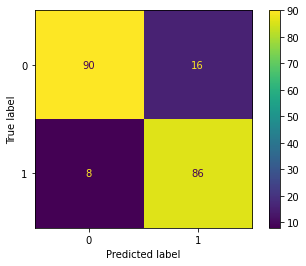

In [47]:
log_score = log.score(X_test, y_test)

metrics(y_test, y_pred, log_score)

#### K-Nearest Neighbors

In [48]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

In [49]:
# Get average of 3-fold cross-validation score using an KN estimator.
n_folds = 3
cv_error = np.average(cross_val_score(KNeighborsClassifier(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.84801



In [50]:
clf2 = make_pipeline(SelectKBest(f_regression, k=4),KNeighborsClassifier())
scores = cross_val_score(clf2, Xs, y, cv=3)

avg_score_uncertainty(scores)

[0.79341317 0.81981982 0.81081081]
Average score and uncertainty: (80.80 +- 0.633)%



The accuracy score is 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       106
           1       0.89      0.84      0.86        94

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

The Confusion Matrix:
 [[96 10]
 [15 79]]


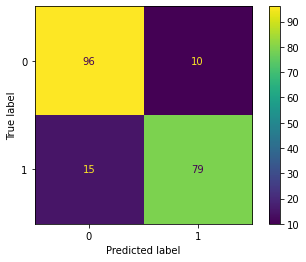

In [51]:
kn_score = kn.score(X_test, y_test)

metrics(y_test, y_pred, kn_score)

#### SVM Classifier

In [52]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [53]:
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.88599



In [54]:
clf2 = make_pipeline(SelectKBest(f_regression, k=4),SVC(probability=True))
scores = cross_val_score(clf2, Xs, y, cv=3)

avg_score_uncertainty(scores)

[0.82634731 0.85285285 0.83483483]
Average score and uncertainty: (83.80 +- 0.638)%



The accuracy score is 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       106
           1       0.90      0.89      0.90        94

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200

The Confusion Matrix:
 [[97  9]
 [10 84]]


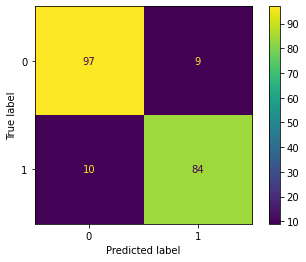

In [55]:
svm_score = svm.score(X_test, y_test)

metrics(y_test, y_pred, svm_score)

#### Random Forest Classifier

In [56]:
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [57]:
# Get average of 3-fold cross-validation score using an RF estimator.
n_folds = 3
cv_error = np.average(cross_val_score(RandomForestClassifier(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.88600



In [58]:
clf2 = make_pipeline(SelectKBest(f_regression, k=4),RandomForestClassifier())

scores = cross_val_score(clf2, Xs, y, cv=3)

avg_score_uncertainty(scores)

[0.81437126 0.85285285 0.81381381]
Average score and uncertainty: (82.70 +- 1.055)%



The accuracy score is 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       106
           1       0.88      0.90      0.89        94

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

The Confusion Matrix:
 [[94 12]
 [ 9 85]]


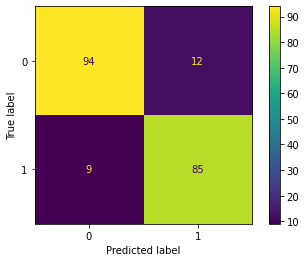

In [59]:
rfc_score = rfc.score(X_test, y_test)
metrics(y_test, y_pred, rfc_score)

We decided to select the SVM model as it had the highest accuracy and f1 score. We proceed to investigate the feature importance for this model compared to the others.

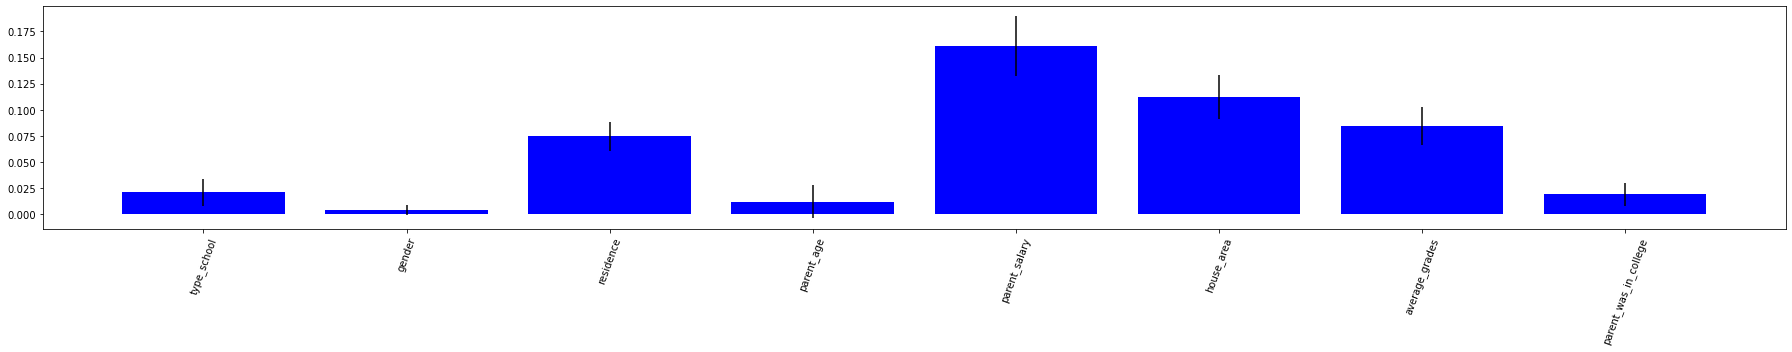

In [63]:
# SVM Classifier (Sample for the highest accuracy and f1 score)

from sklearn.inspection import permutation_importance

result = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

m = []
n = []

for i,j in enumerate(result.importances_mean):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
plt.bar(x=m,height=n, yerr=result.importances_std)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

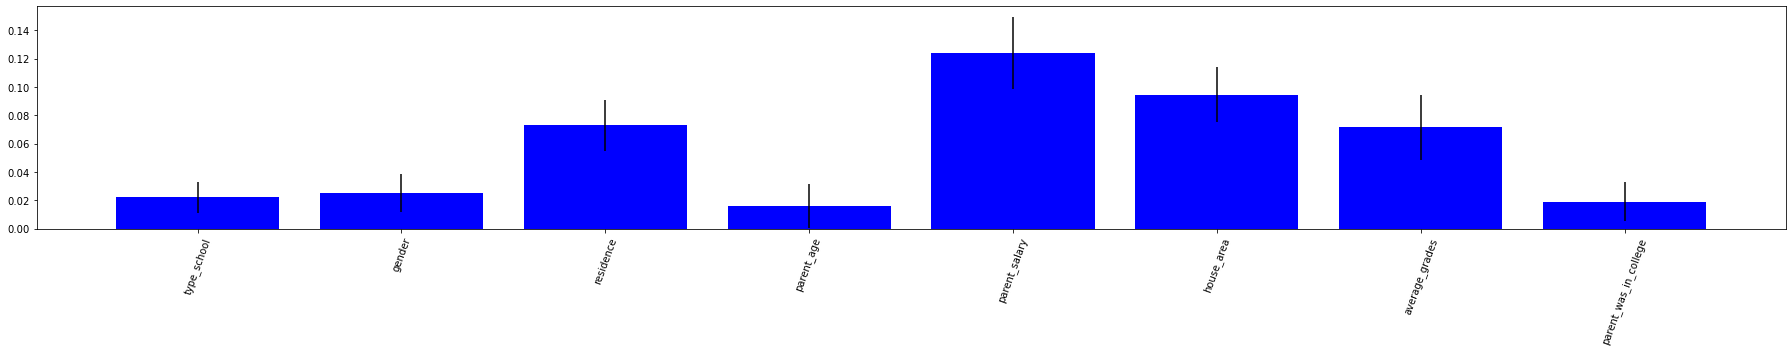

In [66]:
# K-Nearest Neighbors

from sklearn.inspection import permutation_importance

result = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

m = []
n = []

for i,j in enumerate(result.importances_mean):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
plt.bar(x=m,height=n, yerr=result.importances_std)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

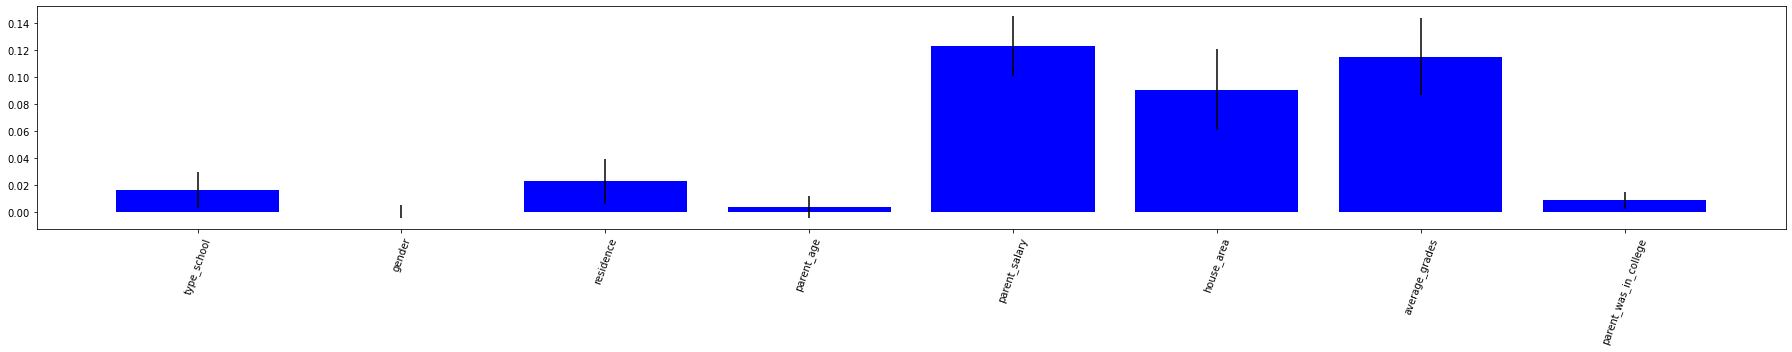

In [67]:
# Random Forest Classifier (Sample for the second highest accuracy)

from sklearn.inspection import permutation_importance

result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

m = []
n = []

for i,j in enumerate(result.importances_mean):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
plt.bar(x=m,height=n, yerr=result.importances_std)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

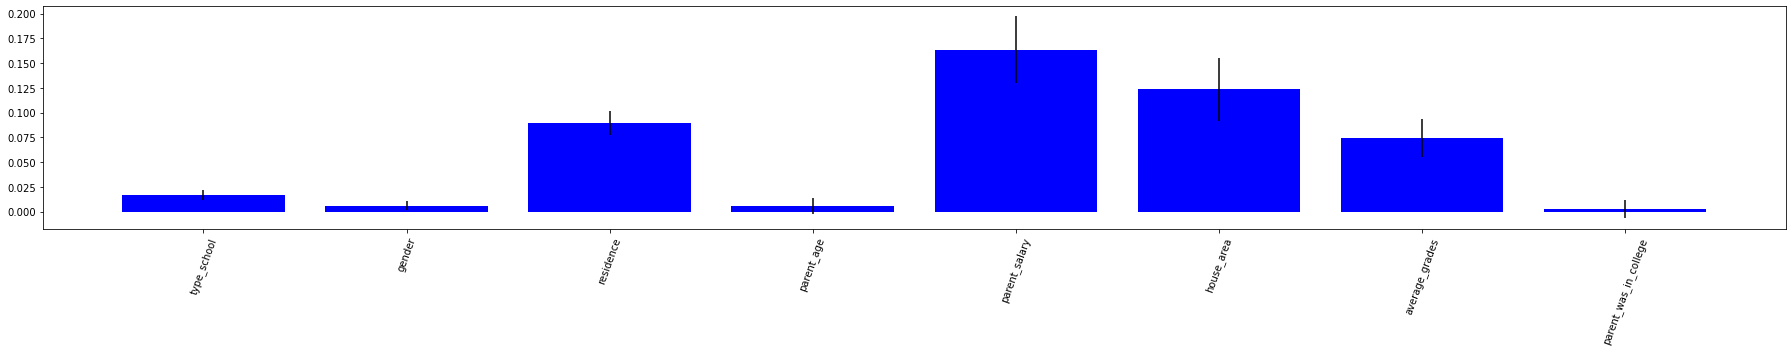

In [68]:
# Logistic Regression (Sample for the second highest accuracy)

from sklearn.inspection import permutation_importance

result = permutation_importance(log, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

m = []
n = []

for i,j in enumerate(result.importances_mean):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
plt.bar(x=m,height=n, yerr=result.importances_std)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

We can see that the four models all have similar weights assigned to the features with **parent_salary**, **house_area**, **average_grades**, and **residence** being the strongest predictors ad

## Part 4: Evaluation with Lime

In order to explain predictions of our chosen model, we use LIME for model intepretability. In the following, we run LIME on a few individual predictions to illustrate the confidence of the model and how each feature is weighted. Details about these explanations are discussed in our paper.